In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear
data['hour'] = data['fecha'].dt.hour

sns.set(style="darkgrid", context="talk")

In [114]:
productos_mas_convertidos = data[data.event == 'conversion']
productos_mas_convertidos = productos_mas_convertidos.model.value_counts().head(30).keys().tolist()

visitas = data[data.event == 'visited site']
mas_usado = visitas.operating_system_version.value_counts().head(20).keys().tolist()

Text(0.5,1,'Cantidad de conversiones de cada producto por sistema operativo')

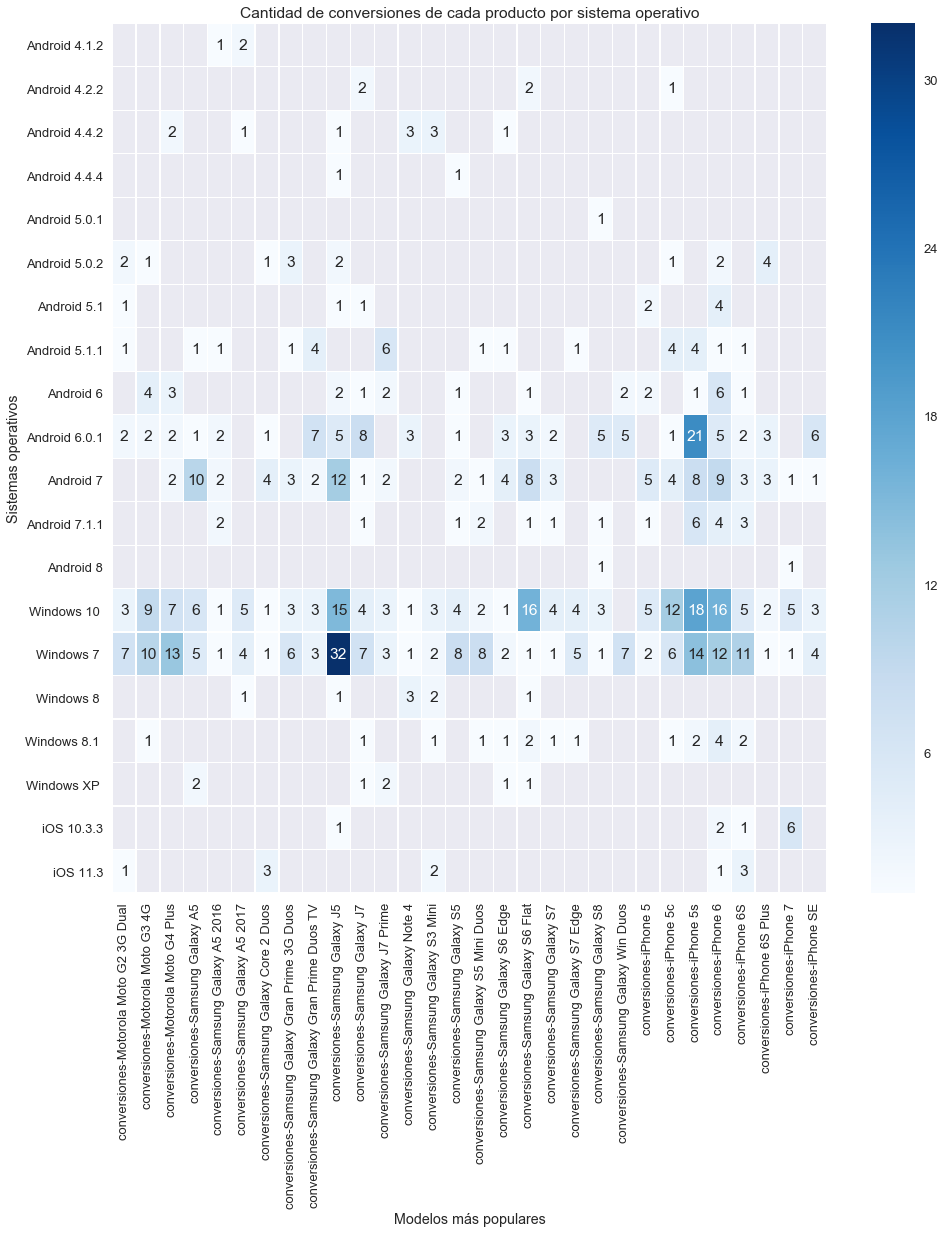

In [172]:
personas = data[data['event'] == 'visited site']
personas = data[['person', 'country', 'city', 'region', 'device_type', 'screen_resolution', 'operating_system_version', 'browser_version']]
personas = personas.dropna().drop_duplicates('person')

conversiones = data[data['event'] == 'conversion']
conversiones.groupby('person').model.value_counts().to_frame('conversiones').reset_index()
conversiones = conversiones[['person', 'model']]
merge = pd.merge(personas, conversiones, on = 'person')
merge = merge[merge['model'].isin(productos_mas_convertidos)]
merge = merge[merge['operating_system_version'].isin(mas_usado)]

merge = merge.groupby('operating_system_version').model.value_counts().to_frame('conversiones').unstack('model')
# merge
plt.figure(figsize = (16, 16))
graf = sns.heatmap(data = merge, cmap = 'Blues', linewidths=0.3, annot = True)
graf.set_xlabel('Modelos más populares')
graf.set_ylabel('Sistemas operativos')
graf.set_title('Cantidad de conversiones de cada producto por sistema operativo')

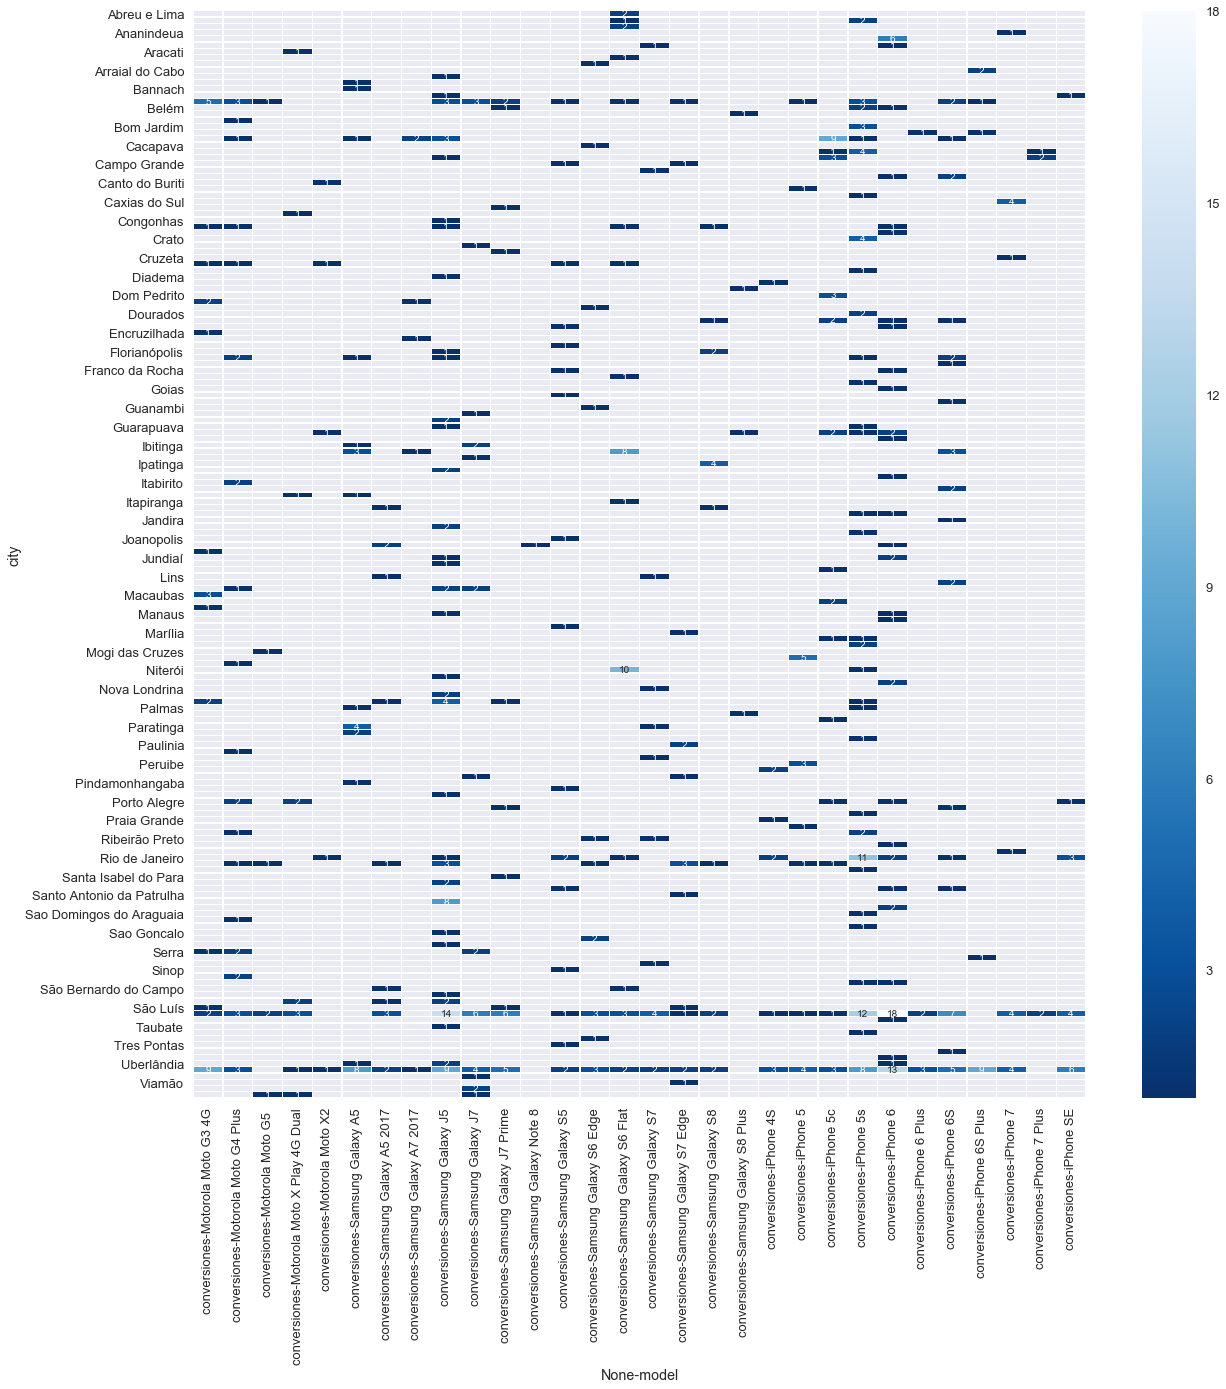

In [108]:
personas = data[data['event'] == 'visited site']
personas = data[['person', 'country', 'city', 'region', 'device_type', 'screen_resolution', 'operating_system_version', 'browser_version']]
personas = personas.dropna().drop_duplicates('person')

conversiones = data[data['event'] == 'conversion']
conversiones.groupby('person').model.value_counts().to_frame('conversiones').reset_index()
conversiones = conversiones[['person', 'model']]
merge = pd.merge(personas, conversiones, on = 'person')
merge = merge[merge['model'].isin(productos_mas_convertidos)]
# merge = merge[merge['operating_system_version'].isin(mas_usado)]
# merge
merge = merge.groupby('city').model.value_counts().to_frame('conversiones').unstack('model')
plt.figure(figsize = (20, 20))
sns.heatmap(data = merge, annot = True, cmap = 'Blues_r', linewidths=0.3)

Text(0.5,1,'Cantidad de visitas (log) a cada producto por sistema operativo')

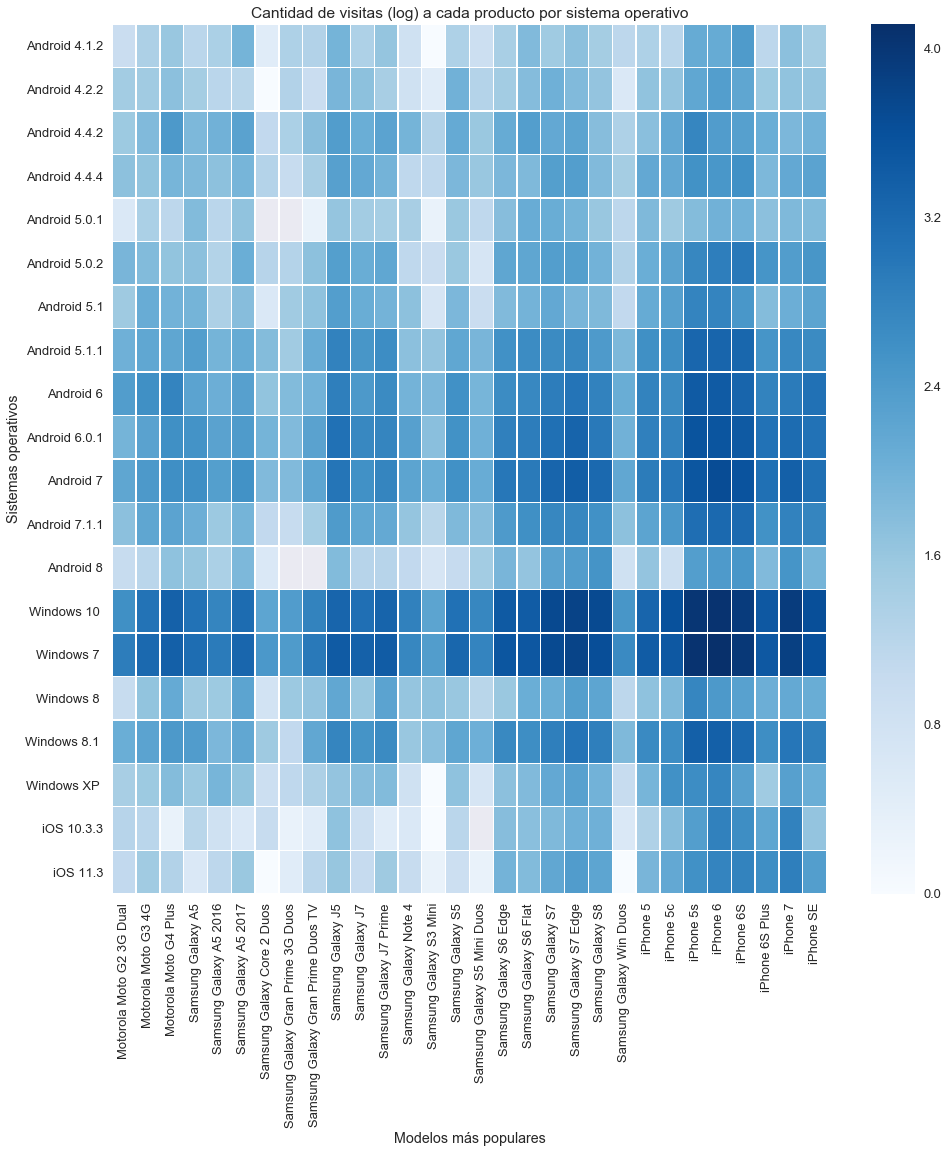

In [170]:
personas = data[data['event'] == 'visited site']
personas = data[['person', 'country', 'city', 'region', 'device_type', 'screen_resolution', 'operating_system_version', 'browser_version']]
personas = personas.dropna().drop_duplicates('person')

conversiones = data[data['event'] == 'viewed product']
conversiones.groupby('person').model.value_counts().to_frame('conversiones').reset_index()
conversiones = conversiones[['person', 'model']]
merge = pd.merge(personas, conversiones, on = 'person')
merge = merge[merge['model'].isin(productos_mas_convertidos)]
merge = merge[merge['operating_system_version'].isin(mas_usado)]
merge = merge.groupby('operating_system_version').model.value_counts().to_frame('conversiones')
merge['conversiones_log'] = np.log10(merge['conversiones'])
merge = merge[['conversiones_log']]
merge = merge.unstack('model')
merge.columns = merge.columns.droplevel()
merge
plt.figure(figsize = (16, 16))
graf = sns.heatmap(data = merge, cmap = 'Blues', linewidths=0.3)
graf.set_xlabel('Modelos más populares')
graf.set_ylabel('Sistemas operativos')
graf.set_title('Cantidad de visitas (log) a cada producto por sistema operativo')